# Fundamentos de Redes Neuronales con Python y Keras

### Redes Neuronales?

Las Redes Neuronales, aun que podria llegar a nuestras mentes imagenes como: Soy leyenda y cosas super futuristas, 
en realidad son cosas que estan ya incrustadas en nuestra realidad, y que sin darnos cuenta las utilizamos dia a dia, 
por ejemplo en las recomendaciones de youtube, en los retoques en fotos en un sector cotidiano, pero tambien en 
cada uno de los campos de estudio de la humanidad, se aun utilizado para impulsar exponencialmente el conocimiento
que tenemos en cada una de las areas 



### Como es una Red neuronal?

Las Redes Neruronales son inspiracion de las redes neuronales biologicas
Tenemos unas entradas de informacion se prosesa y se entrega informacion mas limpia a la siguente neurona 
 tambien llamadas perseptron cuando fueron creadas en los años 50

### Conocimientos Previos

- Python
- Numpy
- Pandas
- Matplotlib
- Claculo

### Herramientas que se podrian utilizar

- TensorFlow
- Microsoft Cognitive Toolkit
- theano
- Keras
- PyTorch
- Torch

Las herramientas más conocidas para manejar redes neuronalnes son TensorFlow y PyTorch.


Keras es una API, se utiliza para facilitar el consumo del backend.


Utilizaremos la tarjeta GPU, porque permite procesas más datos matemáticos necesarios en el deep learning.

### Que es Inteligencia Artificial, Machine Learning, Deep Learning ?

- La inteligencia artificial son los intentos de replicar la inteligencia humana en sistemas artificiales.

- Machine learning son las técnicas de aprendizaje automático, en donde mismo sistema aprende como encontrar una respuesta sin que alguien lo este programando.

- Deep learning es todo lo relacionado a las redes neuronales. Se llama aprendizaje profundo porque a mayor capas conectadas ente sí se obtiene un aprendizaje más fino.


- En el Deep learning existen dos grandes problemas:

        - Overfitting: Es cuando el algoritmo “memoriza” los datos y la red neuronal no sabe generalizar.
        - Caja negra: Nosotros conocemos las entradas a las redes neuronales. Sim embargo, no conocemos que es lo que pasa dentro de las capas intermedias de la red.

# Tu primera red neuronal con Keras

In [1]:
# Importando librerias
import numpy as np
from keras import layers, models
from keras.utils import to_categorical
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
# Cargando el set mi de "Keras"
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()


4


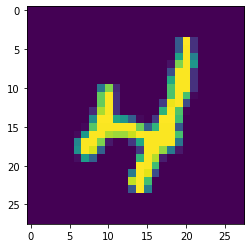

In [3]:
# graficando el numero y validando su valor en labels
plt.imshow(train_data[275])
print(train_labels[275])

In [4]:
#Creando Red Neuronal
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
model.add(layers.Dense(10, activation='softmax'))

In [5]:
# Compilando el modelo
model.compile(  optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics='accuracy' )

In [6]:
#Con esto podemos ver la estructura de nuestra Red Neuronal
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Convirtiendo la data en valores desimales 
# para que puedan tener un mejor procesamiento
x_train = train_data.reshape(60000,28*28)
x_train = x_train.astype('float32')/255

x_test = test_data.reshape(10000,28*28)
x_test = x_test.astype('float32')/255

In [8]:
# Convirtiendo a datos categoricos
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [9]:
# Entrenando la Red Neuronal
model.fit(x_train, y_train, epochs=5, batch_size=120)

Epoch 1/5
500/500 [==============================] - 6s 4ms/step - loss: 0.4161 - accuracy: 0.8795
Epoch 2/5
500/500 [==============================] - 2s 5ms/step - loss: 0.1051 - accuracy: 0.9696
Epoch 3/5
500/500 [==============================] - 2s 4ms/step - loss: 0.0663 - accuracy: 0.9811
Epoch 4/5
500/500 [==============================] - 2s 5ms/step - loss: 0.0464 - accuracy: 0.9862
Epoch 5/5
500/500 [==============================] - 2s 4ms/step - loss: 0.0347 - accuracy: 0.9895


In [10]:
# Evaluando los datos
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0692 - accuracy: 0.9794


[0.06917745620012283, 0.9793999791145325]

# Es una caja negra la neurona?

## La neurona: una pequeña y poderosa herramienta

La neurona, también llamado perceptrón (nacido en los años 50’s) está inspirado en las redes neuronales biológicas.


El funcionamiento del perceptrón se describe de la siguiente manera:


    - Se realiza una suma ponderada de las entradas con los pesos (weights w). Esto da como resultado una salida lineal.

    - Esta salida se pasa por una función de activación que introduce no linealidades al perceptrón.

    - Si el modelo no satisface de forma adecuada el problema entonces se itera. Se itera actualizando los pesos hasta resolver el problema.

## Arquitectura de una red neuronal

La arquitectura de la red puede ser dividida en tres partes:

- La capa de entrada en donde los datos son introducidos.
- La cada de salida que hace una predicción
- Las capas ocultas, que se encuentran entre la capa de salida y la capa de entrada. Las capas ocultas son quienes hacen las operaciones matemáticas.


Dentro de la arquitectura de la red neuronal ocurren muchas operaciones de producto punto entre las entradas de cada perceptron con sus respectivos pesos. Estas operaciones son lineales.


Las funciones de activación son la solución al colapso de las linealidades de las capas de la red neuronal.

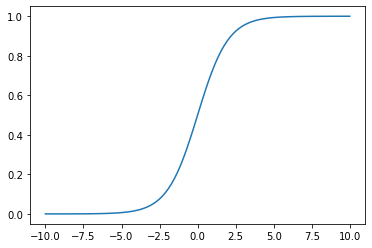

In [11]:
########### Funciones de Activacion #################

## SIGMOIDE
def sigmoid(a):
    return 1 / (1+np.exp(-a))
x = np.linspace(10,-10,100)
plt.plot(x, sigmoid(x))

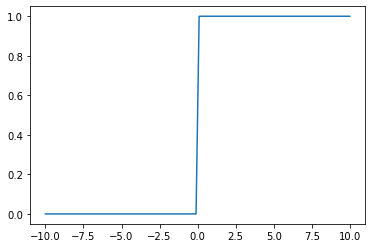

In [12]:
## ESCALONADA O STEP

def escalonada(x):
    return np.piecewise(x,[x<0.0, x>0.0], [0,1])
x = np.linspace(10,-10,100)
plt.plot(x, escalonada(x))

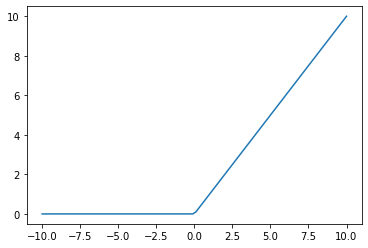

In [13]:
## RELU

def relu(x):
    return np.piecewise(x,[x<0, x>0], [0,lambda x: x])
x = np.linspace(10,-10,100)
plt.plot(x, relu(x))

In [14]:
########### Funciones de Perdida #################

## ERROR CUADRATICO MEDIO
def mse(y, y_hat, derivative=False):
    if derivative:
        return (y_hat - y)
    else:
        return np.mean((y_hat - y)**2)

real = np.array([0,0,1,1])
preccion = np.array([0.9,0.5,0.2,0.0])

mse(real,preccion)

0.675